#Kavish Nag
#24070126085
#AIML B1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("/content/test.csv")
df.head()

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,15,10,Female,White,1,HS,Public,City,72.346053,62.217134,...,2.521745,0.868836,0.310172,0,1,1,1,0,3,3
1,16,11,Female,Hispanic,1,<HS,Private,City,77.889157,72.748030,...,3.275626,0.909595,1.175586,1,1,0,0,1,3,1
2,17,12,Female,Black,2,HS,Public,Rural,72.966587,65.585472,...,2.974137,0.870952,1.112556,1,1,0,0,0,3,3
3,16,11,Female,White,2,HS,Public,Town,96.674049,88.035852,...,3.676590,1.000000,1.067679,0,0,0,0,1,4,5
4,16,11,Male,Black,3,Bachelors+,Public,Rural,81.989270,77.485372,...,2.255014,0.897957,0.841936,0,1,0,1,0,4,2


In [7]:
#drop columns
df.drop(['Race','AttendanceRate','StudyHours','InternetAccess','Extracurricular','PartTimeJob','ParentSupport','Romantic','FreeTime','GoOut'], axis=1, inplace=True)
df.head()

,Age,Grade,Gender,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,TestScore_Science,GPA
0,15,10,Female,1,HS,Public,City,72.346053,62.217134,73.008079,2.521745
1,16,11,Female,1,<HS,Private,City,77.889157,72.748030,76.303717,3.275626
2,17,12,Female,2,HS,Public,Rural,72.966587,65.585472,68.099411,2.974137
3,16,11,Female,2,HS,Public,Town,96.674049,88.035852,100.000000,3.676590
4,16,11,Male,3,Bachelors+,Public,Rural,81.989270,77.485372,72.715066,2.255014


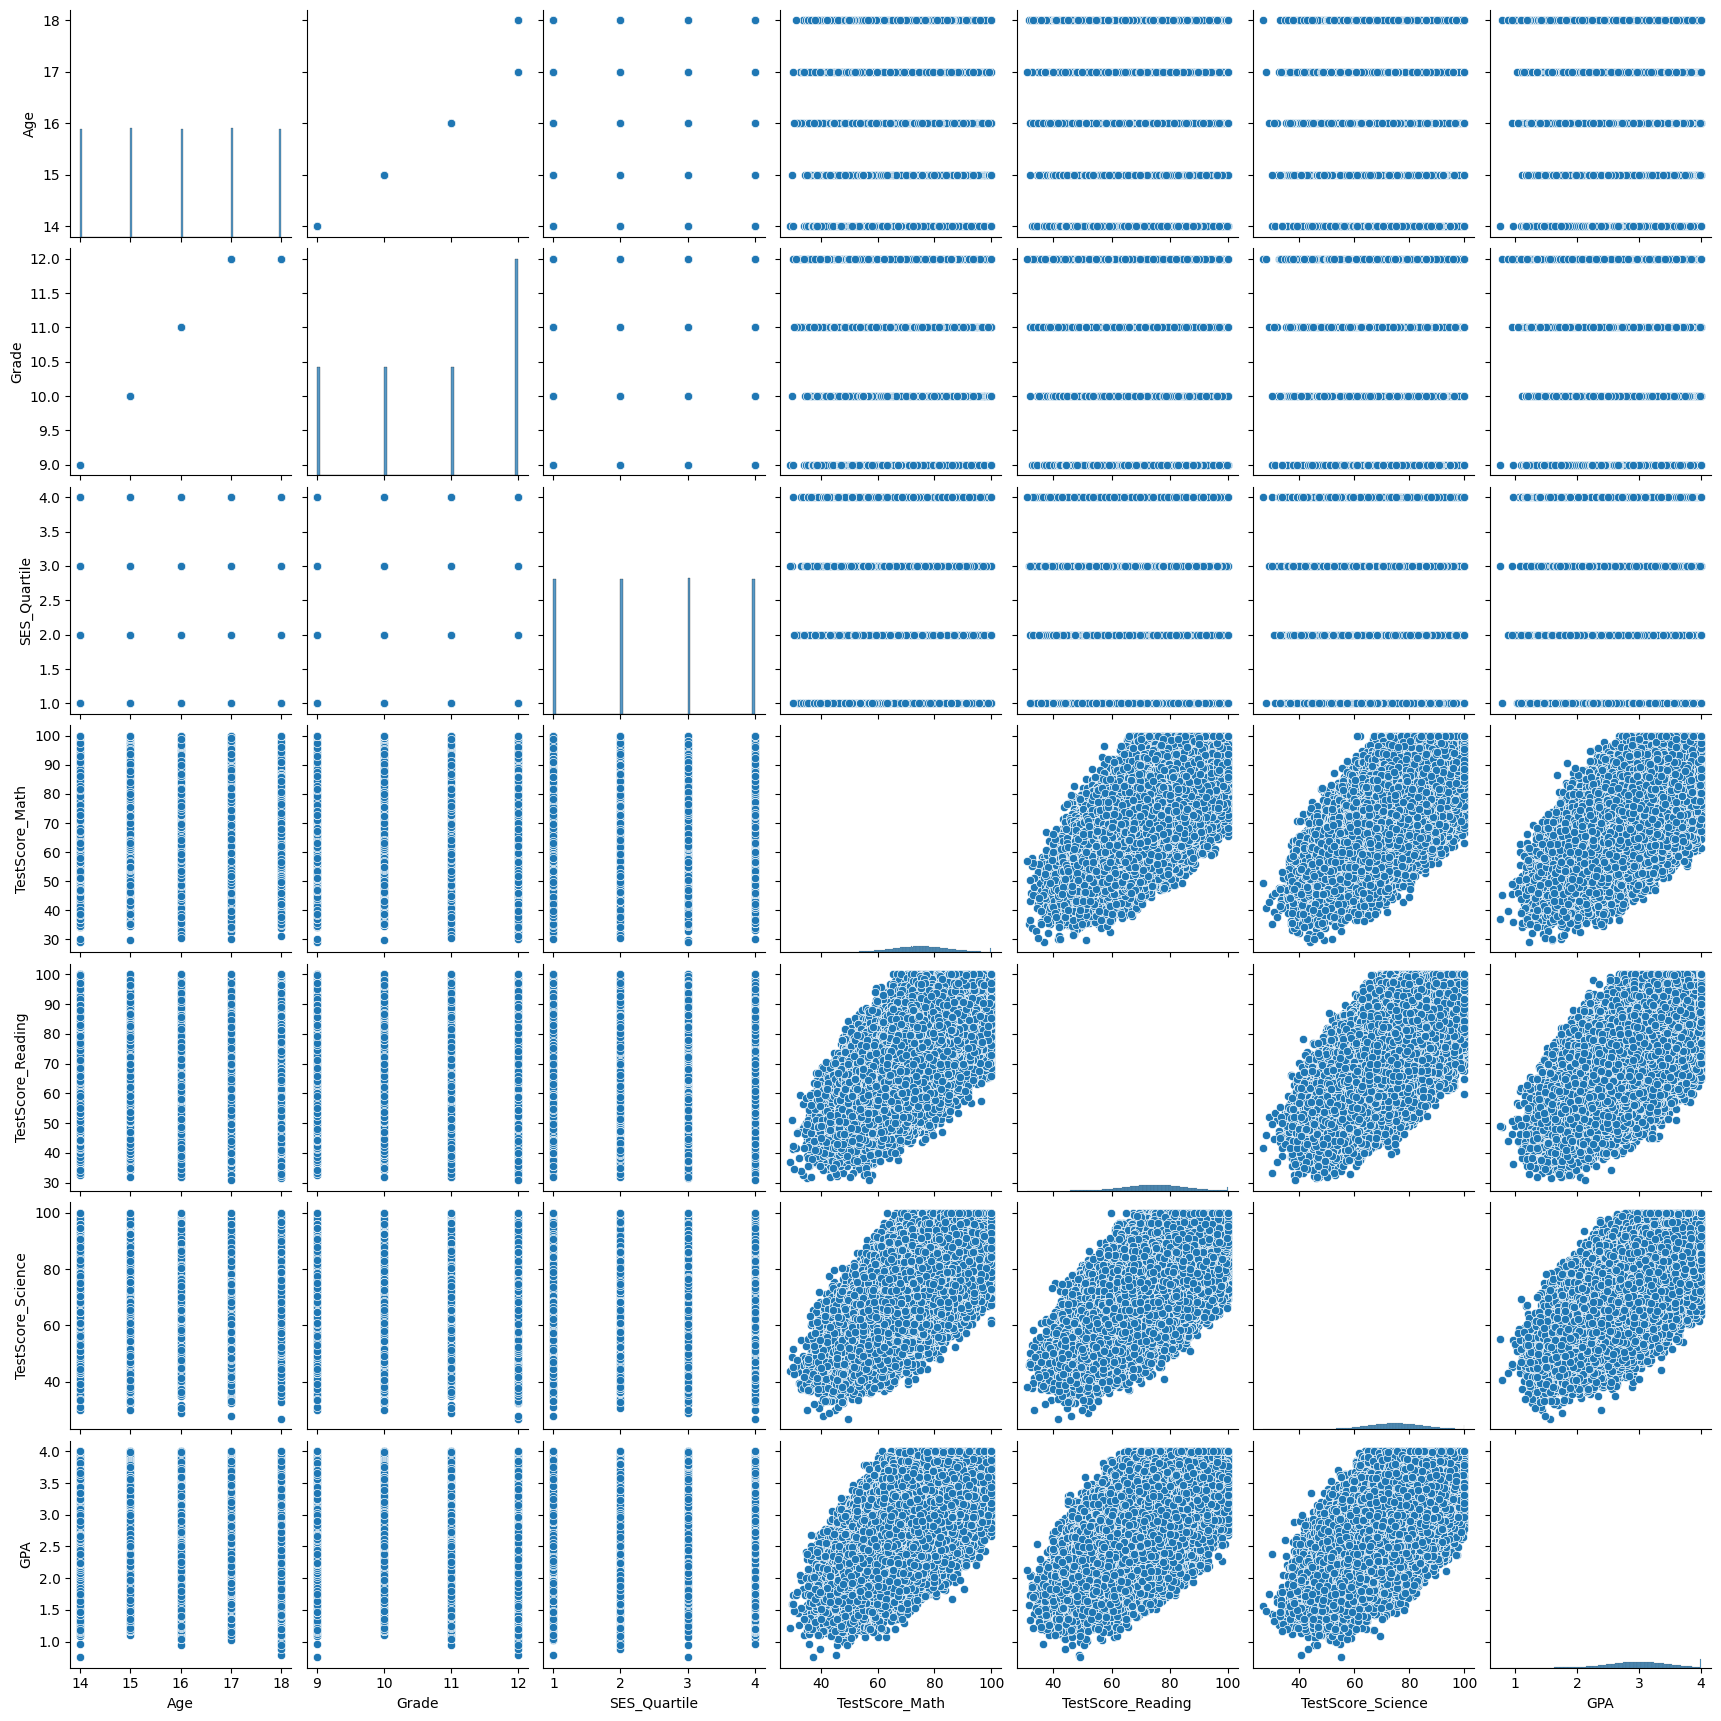

In [ ]:
sns.pairplot(df)

In [8]:
#map gender to 0 and 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,Age,Grade,Gender,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,TestScore_Science,GPA
0,15,10,1,1,HS,Public,City,72.346053,62.217134,73.008079,2.521745
1,16,11,1,1,<HS,Private,City,77.889157,72.748030,76.303717,3.275626
2,17,12,1,2,HS,Public,Rural,72.966587,65.585472,68.099411,2.974137
3,16,11,1,2,HS,Public,Town,96.674049,88.035852,100.000000,3.676590
4,16,11,0,3,Bachelors+,Public,Rural,81.989270,77.485372,72.715066,2.255014


In [9]:
df_enc=pd.get_dummies(df)
df_enc.head()

,Age,Grade,Gender,SES_Quartile,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,ParentalEducation_<HS,ParentalEducation_Bachelors+,ParentalEducation_HS,ParentalEducation_SomeCollege,SchoolType_Private,SchoolType_Public,Locale_City,Locale_Rural,Locale_Suburban,Locale_Town
0,15,10,1,1,72.346053,62.217134,73.008079,2.521745,False,False,True,False,False,True,True,False,False,False
1,16,11,1,1,77.889157,72.748030,76.303717,3.275626,True,False,False,False,True,False,True,False,False,False
2,17,12,1,2,72.966587,65.585472,68.099411,2.974137,False,False,True,False,False,True,False,True,False,False
3,16,11,1,2,96.674049,88.035852,100.000000,3.676590,False,False,True,False,False,True,False,False,False,True
4,16,11,0,3,81.989270,77.485372,72.715066,2.255014,False,True,False,False,False,True,False,True,False,False


In [10]:
df_enc.shape

(999997, 18)

In [11]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999997 entries, 0 to 999996
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            999997 non-null  int64  
 1   Grade                          999997 non-null  int64  
 2   Gender                         999997 non-null  int64  
 3   SES_Quartile                   999997 non-null  int64  
 4   TestScore_Math                 999997 non-null  float64
 5   TestScore_Reading              999997 non-null  float64
 6   TestScore_Science              999997 non-null  float64
 7   GPA                            999997 non-null  float64
 8   ParentalEducation_<HS          999997 non-null  bool   
 9   ParentalEducation_Bachelors+   999997 non-null  bool   
 10  ParentalEducation_HS           999997 non-null  bool   
 11  ParentalEducation_SomeCollege  999997 non-null  bool   
 12  SchoolType_Private            

In [12]:
for col in df_enc.columns:
    if df_enc[col].dtype == 'bool':
      df_enc[col] = df_enc[col].astype(int)

In [13]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999997 entries, 0 to 999996
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            999997 non-null  int64  
 1   Grade                          999997 non-null  int64  
 2   Gender                         999997 non-null  int64  
 3   SES_Quartile                   999997 non-null  int64  
 4   TestScore_Math                 999997 non-null  float64
 5   TestScore_Reading              999997 non-null  float64
 6   TestScore_Science              999997 non-null  float64
 7   GPA                            999997 non-null  float64
 8   ParentalEducation_<HS          999997 non-null  int64  
 9   ParentalEducation_Bachelors+   999997 non-null  int64  
 10  ParentalEducation_HS           999997 non-null  int64  
 11  ParentalEducation_SomeCollege  999997 non-null  int64  
 12  SchoolType_Private            

In [14]:
df_enc.head()


,Age,Grade,Gender,SES_Quartile,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,ParentalEducation_<HS,ParentalEducation_Bachelors+,ParentalEducation_HS,ParentalEducation_SomeCollege,SchoolType_Private,SchoolType_Public,Locale_City,Locale_Rural,Locale_Suburban,Locale_Town
0,15,10,1,1,72.346053,62.217134,73.008079,2.521745,0,0,1,0,0,1,1,0,0,0
1,16,11,1,1,77.889157,72.748030,76.303717,3.275626,1,0,0,0,1,0,1,0,0,0
2,17,12,1,2,72.966587,65.585472,68.099411,2.974137,0,0,1,0,0,1,0,1,0,0
3,16,11,1,2,96.674049,88.035852,100.000000,3.676590,0,0,1,0,0,1,0,0,0,1
4,16,11,0,3,81.989270,77.485372,72.715066,2.255014,0,1,0,0,0,1,0,1,0,0


In [15]:
x=df_enc[['Age','Grade','Gender','SES_Quartile','TestScore_Math','TestScore_Reading','TestScore_Science','ParentalEducation_<HS','ParentalEducation_Bachelors+','ParentalEducation_HS','ParentalEducation_SomeCollege','SchoolType_Private','SchoolType_Public','Locale_City','Locale_Rural','Locale_Suburban','Locale_Town']]
y=df_enc['GPA']

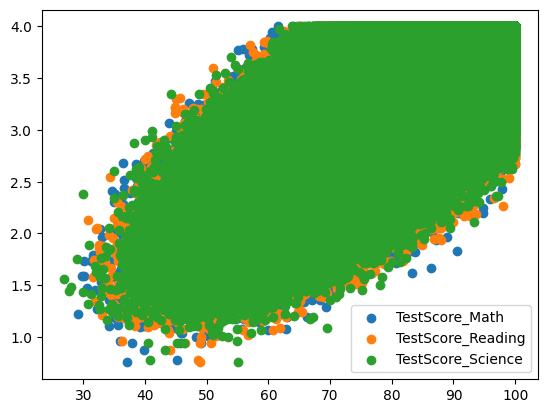

In [16]:
plt.scatter(df_enc['TestScore_Math'],y,label='TestScore_Math')
plt.scatter(df_enc['TestScore_Reading'],y,label='TestScore_Reading')
plt.scatter(df_enc['TestScore_Science'],y,label='TestScore_Science')
plt.legend(loc=4)

In [17]:
from sklearn.model_selection import train_test_split
x_train,X,y_train,Y=train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(X,Y,test_size=0.5,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print("Intercept: ", model.intercept_)
print("Coefficients: ")
list(zip(x_train, model.coef_))

Intercept:  0.030365916057872422
Coefficients: 


[('Age', np.float64(0.0018084735525963585)),
 ('Grade', np.float64(-0.00191259079614167)),
 ('Gender', np.float64(-0.0005825400907928037)),
 ('SES_Quartile', np.float64(-0.00023856834464901867)),
 ('TestScore_Math', np.float64(0.013217111102413722)),
 ('TestScore_Reading', np.float64(0.013150778290614678)),
 ('TestScore_Science', np.float64(0.013099380514009327)),
 ('ParentalEducation_<HS', np.float64(0.0004181364034486273)),
 ('ParentalEducation_Bachelors+', np.float64(-0.000525031362986196)),
 ('ParentalEducation_HS', np.float64(-0.0003431765145085625)),
 ('ParentalEducation_SomeCollege', np.float64(0.00045007147404613077)),
 ('SchoolType_Private', np.float64(0.00062036390252988)),
 ('SchoolType_Public', np.float64(-0.0006203639025298802)),
 ('Locale_City', np.float64(0.00011748313304933831)),
 ('Locale_Rural', np.float64(0.0006435032170998459)),
 ('Locale_Suburban', np.float64(-0.0003078599801407852)),
 ('Locale_Town', np.float64(-0.0004531263700083979))]

In [20]:
y_val_pred=model.predict(x_val)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_val,y_val_pred)

0.5855268107566962

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_val_pred)

0.08734970202486686

In [22]:
y_pred=model.predict(x_test)

In [23]:
mean_squared_error(y_pred,y_test)

0.0882885911022067

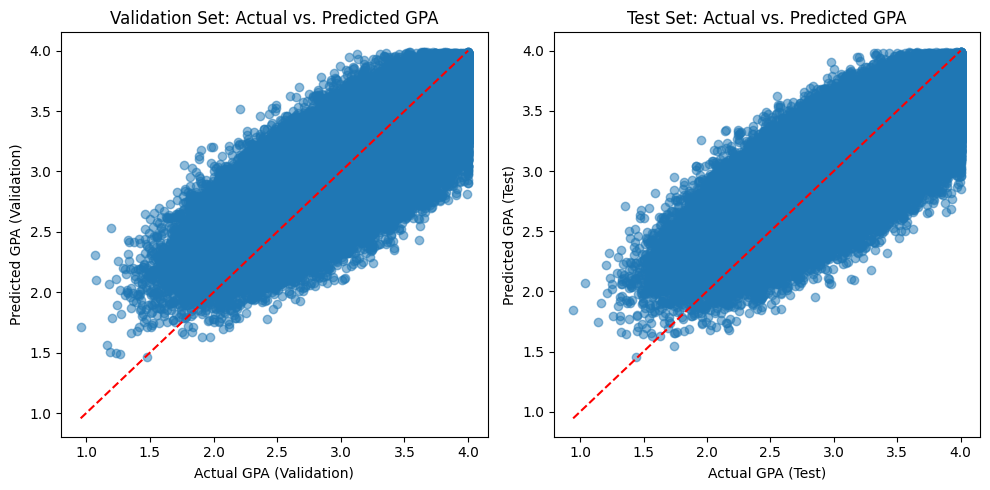

In [24]:
plt.figure(figsize=(10, 5))

# Validation Set Plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.xlabel('Actual GPA (Validation)')
plt.ylabel('Predicted GPA (Validation)')
plt.title('Validation Set: Actual vs. Predicted GPA')

# Test Set Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual GPA (Test)')
plt.ylabel('Predicted GPA (Test)')
plt.title('Test Set: Actual vs. Predicted GPA')

plt.tight_layout()
plt.show()